In [17]:
import numpy as np
import matplotlib.pyplot as plt

def Distancia_Euclidiana(punto1, punto2):
    x0,y0 = punto1
    x1,y1 = punto2
    return ((x0-x1)**2 + (y0-y1)**2)**(1/2)

def inner_point_euclides(Datos, n, centro, radio):
    dentro = []
    indices = []    
    for i in range(n):
        if Distancia_Euclidiana(Datos[i],centro) < radio:
            dentro.append(Datos[i])
            indices.append(i)    
    return np.array(dentro)

## Modelando la infeccion

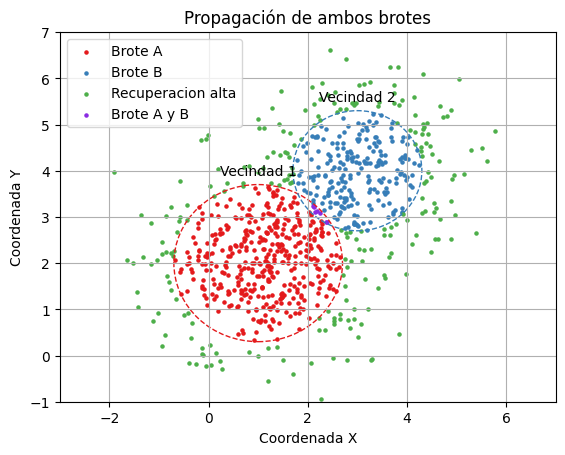

<Figure size 1400x800 with 0 Axes>

In [40]:
# Definir la media (epicentro) de los brotes de infección
media1 = np.array([1, 2])
media2 = np.array([3, 4])

# Definir la matriz de covarianza para ambos brotes de infección
covarianza = np.array([[1, 0], [0, 1]])

# Generar muestras aleatorias para el primer brote de infección
muestras1 = np.random.multivariate_normal(media1, covarianza, 500)
# Generar muestras aleatorias para el segundo brote de infección
muestras2 = np.random.multivariate_normal(media2, covarianza, 350)
# Unir nuestros datos
datos = np.concatenate((muestras1, muestras2), axis=0)

# Catalogar nuestros puntos
bola1 = inner_point_euclides(datos, n = 850, centro = [1,2], radio = 1.7)
bola2 = inner_point_euclides(datos, n = 850, centro = [3,4], radio = 1.3)

brote_A = np.array([list(x) for x in bola1 if x not in bola2])
brote_B = np.array([list(x) for x in bola2 if x not in bola1])
interseccion =  np.array([list(x) for x in bola2 if x not in brote_B])
inner_points = list(bola1) + list(bola2)
aislados = np.array([list(x) for x in datos if x not in np.array(inner_points)])

# Visualizar los datos generados
plt.scatter(brote_A[:, 0], brote_A[:, 1], label='Brote A', s=5, color='#e41a1c')
plt.scatter(brote_B[:, 0], brote_B[:, 1], label='Brote B', s=5, color='#377eb8')
plt.scatter(aislados[:, 0], aislados[:, 1], label='Recuperacion alta', s=5, color='#4daf4a')
plt.scatter(interseccion[:, 0], interseccion[:, 1], label='Brote A y B', s=5, color='#8a2be2')

circle1 = plt.Circle(media1, 1.7, color = '#e41a1c', fill = False, linestyle = '--')
plt.gca().add_patch(circle1)
plt.annotate(f'Vecindad 1', xy=(media1[0], media1[1] +  1.7 + 0.2), ha='center')
circle2 = plt.Circle(media2, 1.3, color = '#377eb8', fill = False, linestyle = '--')
plt.gca().add_patch(circle2)
plt.annotate(f'Vecindad 2', xy=(media2[0], media2[1] +  1.3 + 0.2), ha='center')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Propagación de ambos brotes')
plt.ylim(-1,7)
plt.xlim(-3,7)
plt.legend()
plt.grid(True)
plt.figure(figsize=(14, 8))
plt.show()

## Distancias

In [44]:
distancia_brote_A = sum([Distancia_Euclidiana([1,2],x) for x in bola1])
distancia_brote_B = sum([Distancia_Euclidiana([3,4],x) for x in bola2])
print("Distancia promedio de contagio brote A: ", distancia_brote_A/len(bola1))
print("Distancia promedio de contagio brote B: ", distancia_brote_B/len(bola2))

Distancia promedio de contagio brote A:  0.9929607099663491
Distancia promedio de contagio brote B:  0.8118225624087637


Calculemos la distancia entre las vecindades bajo la metrica 
𝑑(𝐴,𝐵) = 𝑖𝑛𝑓{𝑑(𝑥,𝑦):𝑥 ∈ 𝐴, 𝑦 ∈ 𝐵}

In [56]:
if not np.array_equal(bola1[0], bola2[0]):
    infimum = Distancia_Euclidiana(bola1[0],bola2[0])
else:
    infimum = Distancia_Euclidiana(bola1[0],bola2[1])
    
for subject_i in bola1:
    for subject_j in bola2:
        if not np.array_equal(subject_i, subject_j):
            if Distancia_Euclidiana(subject_i, subject_j)<infimum:
                infimum = Distancia_Euclidiana(subject_i, subject_j)
                
print("Distancia entre las vecindades = ", infimum)

Distancia entre las vecindades =  0.021640545294327535
